In [1]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import datastructure
import numpy
import math
import shapely
import matplotlib.pyplot as plt
import geopandas

In [10]:
polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))#[4:5]
polygons = polygons[polygons.name =='United States of America']

# 3:4 is trinidad
polygons = geopandas.read_file('../data/caribbean.gpkg')[20:21]

#polygons = geopandas.read_file('../data/santa_barbara.gpkg')

#polygons['row'] = polygons.index
polygons

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,HASC_1,...,Shape_Area,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,GID_0,row,geometry
20,237,TCA,Turks and Caicos Islands,1,Grand Turk,District,District,None,None,None,...,0.0,0,None,None,None,None,None,None,661,"MULTIPOLYGON (((-71.70486 21.18014, -71.70486 ..."


In [11]:
geom = polygons.iloc[0].geometry
polygon = datastructure.SphericalPolygon(geom)

In [ ]:
polygon.get_convex()

In [8]:
convex_nodes = polygon.get_convex_indices()
print(len(convex_nodes))
convex_nodes

29


array([   84,    83,   274,   384,   383,   340,  2490,  2094, 18497,
       18482, 18479, 13736, 13734, 13732, 13731, 13729, 13723, 13721,
       13702, 13694, 13681, 13674, 13664, 13656, 13655, 11100, 10906,
        9960,  9943], dtype=int32)

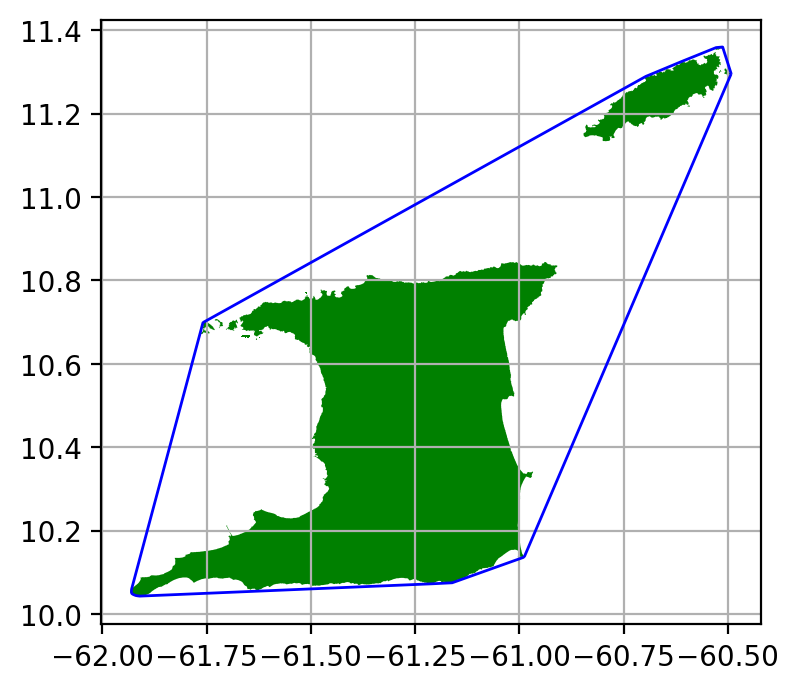

In [6]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

convex = polygon.convex_nodes.as_polygon_df()
convex.exterior.plot(ax=ax, color='b', linewidth=1, markersize=1)
polygons.plot(ax=ax, color='g')


fig.savefig('hull.png')